Лабораторна робота 2

Перше завдання: потрібно  для  датасета з минулої лаб.роботи знизити розмірність та запустити алгоритми звідти(взяв рандом форест) і на основі цього вже порівняти

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from matplotlib.image import imread
from sklearn.cluster import KMeans

In [26]:

df = pd.read_csv("academic Stress level - maintainance 1.csv") 
df = df.dropna()
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [27]:
X = df.drop("Rate your academic stress index ", axis=1)
y = df["Rate your academic stress index "]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [28]:
model = RandomForestClassifier(random_state=42)

start = time.time()
model.fit(X_train, y_train)
time_full = time.time() - start
y_pred = model.predict(X_test)
acc_full = accuracy_score(y_test, y_pred)

print(f"Точність без PCA: {acc_full:.4f}")
print(f"Час навчання без PCA: {time_full:.4f} c")


Точність без PCA: 0.3571
Час навчання без PCA: 0.0762 c


In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

start = time.time()
model.fit(X_train_pca, y_train_pca)
time_pca = time.time() - start
y_pred_pca = model.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)

print(f"Точність після PCA: {acc_pca:.4f}")
print(f"Час навчання після PCA: {time_pca:.4f} c")

Точність після PCA: 0.2857
Час навчання після PCA: 0.1001 c


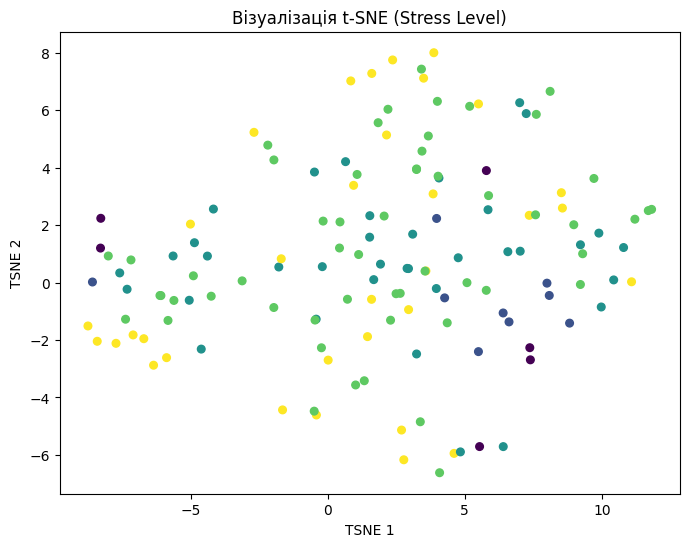

In [30]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis', s=30)
plt.title("Візуалізація t-SNE (Stress Level)")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()

Друге завдання: Кластерний аналіз зображення на основі  k-means   
взяв зображення сови, яке було на телефоні, бо ну яка горда і яка довольна


Image shape: (800, 511, 3)
dtype: uint8


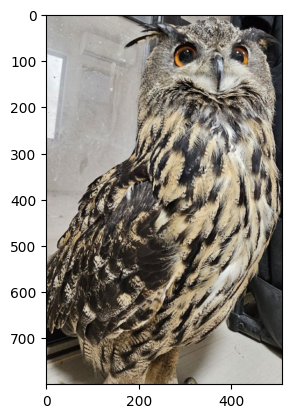

In [31]:
img = imread("5296465236506835783.jpg")
H, W, C = img.shape
print("Image shape:", img.shape)
print("dtype:", img.dtype)

plt.imshow(img)
plt.show()


In [ ]:
data = img / 255.0  
pixels = data.reshape(-1, 3)

k = 4
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(pixels)

KMeans(n_clusters=4, n_init=10, random_state=0)

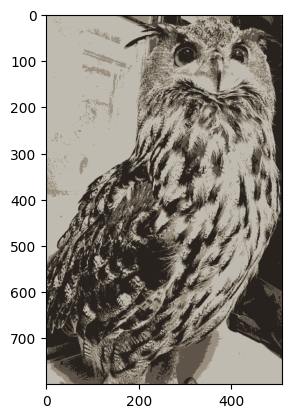

In [33]:

new_colors = kmeans.cluster_centers_[kmeans.labels_]
quantized_img = new_colors.reshape(img.shape)

plt.imshow(quantized_img)
plt.show()

In [ ]:
unique_colors = np.unique(img.reshape(-1, 3), axis=0)
print("Унікальних кольорів у вихідному зображені:", unique_colors.shape[0])
unique_colors = np.unique(quantized_img.reshape(-1, 3), axis=0)
print("Унікальних кольорів в перетвореному зображені:", unique_colors.shape[0])

Унікальних кольорів у вихідному зображені: 39196
Унікальних кольорів в перетвореному зображені: 4


Третє завдання: 